# Model Creation

In [74]:
import pandas as pd
import numpy as np
import sklearn
import pickle
from sklearn.metrics import auc,roc_curve,roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

## Navie Bayes

In [76]:
from sklearn.naive_bayes import MultinomialNB

In [77]:
#loding the vectors

#### Loading BOW vectors

In [79]:
X_train_bow = pickle.load(open('bow_vectors/X_train_bow','rb'))
X_test_bow = pickle.load(open('bow_vectors/X_test_bow','rb'))
bow_features = pickle.load(open('bow_vectors/bow_features','rb'))

In [80]:
y_train = np.load('split dataset/y_train.npy',allow_pickle = True)
y_test = np.load('split dataset/y_test.npy',allow_pickle = True)

In [81]:
train_auc = []
test_auc = []
alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in alpha:
    naive = MultinomialNB(alpha = i)
    naive.fit(X_train_bow,y_train)
    y_train_pred = naive.predict_proba(X_train_bow)[:,1]
    y_test_pred = naive.predict_proba(X_test_bow)[:,1]
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    test_auc.append(roc_auc_score(y_test,y_test_pred))

In [82]:
#graph

Text(0.5, 1.0, 'error plot')

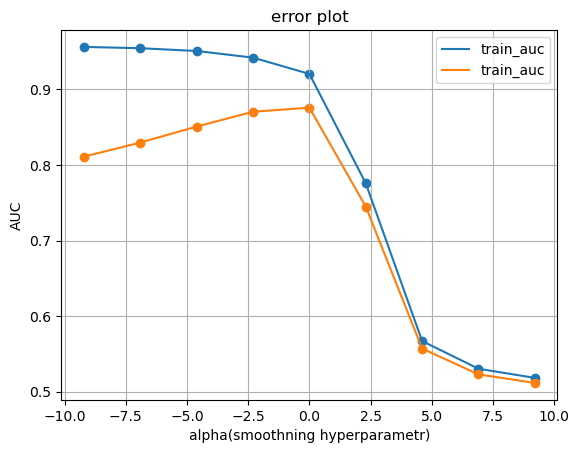

In [83]:
plt.grid(True)
plt.plot(np.log(alpha), train_auc, label = 'train_auc' )
plt.plot(np.log(alpha), test_auc, label = 'train_auc' )
plt.scatter(np.log(alpha), train_auc)
plt.scatter(np.log(alpha), test_auc)
plt.legend()
plt.xlabel('alpha(smoothning hyperparametr)')
plt.ylabel('AUC')
plt.title('error plot')


#### here we can see that at alpha = 0.1  both test and traning has max AUC

In [85]:
optimize_alpha = 0.1
naive_b = MultinomialNB(alpha = optimize_alpha)
naive_b = naive_b.fit(X_train_bow,y_train)
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, naive_b.predict_proba(X_train_bow)[:,1])
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, naive_b.predict_proba(X_test_bow)[:,1])

In [86]:
#graph roc curve

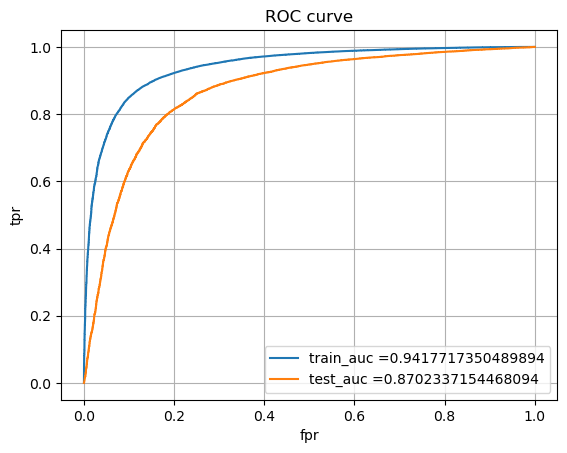

In [87]:
plt.grid(True)
plt.plot(train_fpr, train_tpr, label = 'train_auc ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'test_auc ='+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [88]:
from sklearn.metrics import confusion_matrix
# confusion matrix
def confusion_matrixes(model, X_train, y_train, X_test, y_test):
    train_cm = confusion_matrix(y_train,model.predict(X_train))
    test_cm = confusion_matrix(y_test, model.predict(X_test))
    col_n = ['Negitive','Positive']
    df_train = pd.DataFrame(train_cm,index = col_n, columns= col_n)
    df_test = pd.DataFrame(test_cm,index = col_n, columns= col_n)
    f, axes = plt.subplots(1,2,figsize= (12,4))

    for i in range(2):
        df = df_train if i == 0 else df_test
        sns.heatmap(df,annot = True, cmap = 'inferno', ax = axes[i], fmt = 'd')
        axes[i].set_title(f"Confusion Matrix - {'Train' if i==0 else 'Test'}")
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("True Label")
    plt.show()

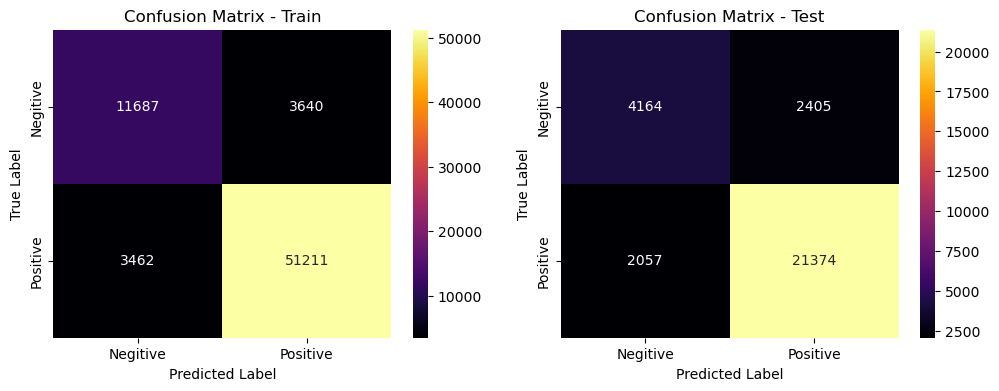

In [89]:
confusion_matrixes(naive_b,X_train_bow,y_train,X_test_bow,y_test)

In [90]:
### Top positive and negitive Features

In [91]:
coff = naive_b.feature_log_prob_[1].reshape(-1,1)
df_imp = pd.DataFrame(coff,columns = ['coef'],index = bow_features)
print('positive words')
positive = df_imp.sort_values(by = 'coef', ascending= False).head(10)
print(positive)
negitive = df_imp.sort_values(by = 'coef').head(10)
print(negitive)

positive words
            coef
good   -4.376268
like   -4.423173
taste  -4.496069
love   -4.691931
great  -4.692837
flavor -4.725639
use    -4.726798
make   -4.739068
one    -4.758813
get    -4.817477
                 coef
stawberrie  -16.83427
mustardms   -16.83427
ewwww       -16.83427
ewwwww      -16.83427
ewwwwww     -16.83427
unmitigated -16.83427
streache    -16.83427
disgutingly -16.83427
porcupine   -16.83427
porduct     -16.83427


## Using TI-IDF 

In [94]:
# loading vectors

In [95]:
X_train_tfidf = pickle.load(open('tfidf_vectors/X_train_tfidf','rb'))
X_test_tfidf = pickle.load(open('tfidf_vectors/X_test_tfidf','rb'))
tfidf_features = pickle.load(open('tfidf_vectors/tfidf_features','rb'))

In [96]:
train_auc = []
test_auc = []
alpha = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in alpha:
    naive = MultinomialNB(alpha = i)
    naive.fit(X_train_tfidf,y_train)
    y_train_pred = naive.predict_proba(X_train_tfidf)[:,1]
    y_test_pred = naive.predict_proba(X_test_tfidf)[:,1]
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    test_auc.append(roc_auc_score(y_test,y_test_pred))

Text(0.5, 1.0, 'error plot')

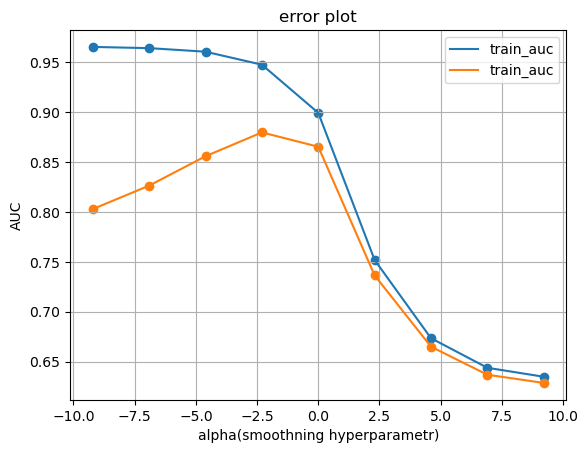

In [97]:
# error graph

plt.grid(True)
plt.plot(np.log(alpha), train_auc, label = 'train_auc' )
plt.plot(np.log(alpha), test_auc, label = 'train_auc' )
plt.scatter(np.log(alpha), train_auc)
plt.scatter(np.log(alpha), test_auc)
plt.legend()
plt.xlabel('alpha(smoothning hyperparametr)')
plt.ylabel('AUC')
plt.title('error plot')

In [98]:
optimize_alpha = 0.1
naive_b = MultinomialNB(alpha = optimize_alpha)
naive_b = naive_b.fit(X_train_tfidf,y_train)
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, naive_b.predict_proba(X_train_tfidf)[:,1])
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, naive_b.predict_proba(X_test_tfidf)[:,1])

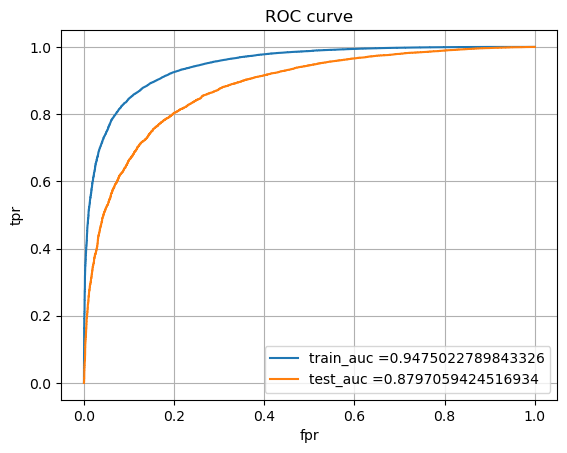

In [99]:
plt.grid(True)
plt.plot(train_fpr, train_tpr, label = 'train_auc ='+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = 'test_auc ='+str(auc(test_fpr,test_tpr)))
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

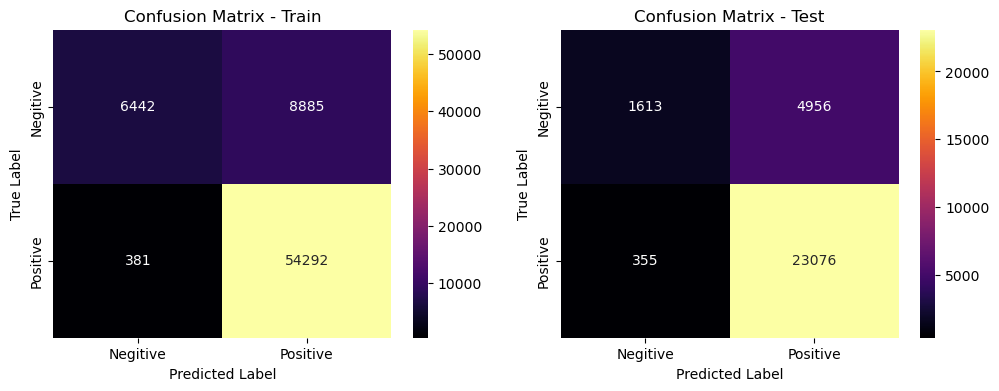

In [100]:
confusion_matrixes(naive_b,X_train_tfidf,y_train,X_test_tfidf,y_test)

In [101]:
coff = naive_b.feature_log_prob_[1].reshape(-1,1)
df_imp = pd.DataFrame(coff,columns = ['coef'],index = tfidf_features)
print('positive words')
positive = df_imp.sort_values(by = 'coef', ascending= False).head(10)
print(positive)
print('='*50)
print('negitive words')
negitive = df_imp.sort_values(by = 'coef').head(10)
print(negitive)

positive words
             coef
good    -4.987432
great   -5.059118
love    -5.081436
taste   -5.166487
like    -5.176879
coffee  -5.253241
tea     -5.254010
flavor  -5.284794
product -5.328445
use     -5.347157
negitive words
                            coef
boondock               -14.76285
snaile                 -14.76285
oniongarlicoreganosoya -14.76285
isugary                -14.76285
onlythat               -14.76285
onmto                  -14.76285
isucrose               -14.76285
isucralose             -14.76285
isubtle                -14.76285
istyle                 -14.76285


## Observation

1. Here we applied both BOW and TFIDF features on naive bayes model
2. TFIDF features model performs slightly better then BOW
3. both looks like overfitter ,also after hyperparameter tunning
4. Naive bayes is not good for this dataset

In [104]:
from prettytable import PrettyTable

In [105]:
z = PrettyTable()
z.field_names = ["Vector","Algorithm","Hyperparametr-alpha","Train AUC","Test AUC"]
z.add_row(['BOW', 'Naive-Bayes', '0.1', '0.941','0.8702' ])
z.add_row(['TF-IDF', 'Naive-Bayes', '0.1', '0.947','0.8797'])


In [106]:
print(z)

+--------+-------------+---------------------+-----------+----------+
| Vector |  Algorithm  | Hyperparametr-alpha | Train AUC | Test AUC |
+--------+-------------+---------------------+-----------+----------+
|  BOW   | Naive-Bayes |         0.1         |   0.941   |  0.8702  |
| TF-IDF | Naive-Bayes |         0.1         |   0.947   |  0.8797  |
+--------+-------------+---------------------+-----------+----------+


In [107]:
pickle.dump(naive_b,open('model.pkl','wb'))